In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/homework/2017-10/planetas/lowp_finalresults.csv")

In [3]:
dat= pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/homework/2017-10/planetas/highp_finalresults.csv')

In [17]:
#cuenta el numero de planetas
def count_planet(datos):
    planets=datos['ident']
    sistems=np.zeros(2975)
    for i in range(np.size(planets)):
        sistems[planets[i]]=sistems[planets[i]]+1
    return sistems

#Calcula Masa total del sitema
def count_totalMass(datos):
    planets=datos['ident']
    Mass=datos['emepla(i)/emet']
    MassSis=np.zeros(2975)
    for i in range(np.size(planets)):
        MassSis[planets[i]]=MassSis[planets[i]]+Mass[i]
#   converter(MassSis)
    return MassSis

#convierte masas terrestreas a masas solares
#def converter(cosas):
#    for i in range(np.size(cosas)):
#        cosas[i]=cosas[i]*0.000003003

#calcula masa del disco
def Mass_Disk(datos):
    planets=datos['ident']
    Mass_Disk=datos['emed']
    Mass_D=np.zeros(2975)
    for i in range(np.size(planets)):
        Mass_D[planets[i]]=float(Mass_Disk[i])
    return Mass_D

#calcula la eficiencia de Masa
def Efi_Mass(datos):
    Disk=Mass_Disk(datos)
    Total=count_totalMass(datos)
    Efi_Mass=np.zeros(2975)
    for i in range(2975):
        Efi_Mass[i]=float(Disk[i]/Total[i])
    return Efi_Mass

def initial_parameters(datos):
    planets=datos['ident']
    init_emestar=datos['emestar']
    init_rc=datos['rc']
    init_qest=datos['qest']
    init_sigma=datos['sigmag_0']
    init_emed=datos['emed']
    init_emetal=datos['emetal']
    init_taugas=datos['taugas']
    initial=np.zeros([2975,7])
    for i in range(np.size(planets)):            
        initial[planets[i],0]=init_emestar[planets[i]]
        initial[planets[i],1]=init_rc[planets[i]]
        initial[planets[i],2]=init_qest[planets[i]]
        initial[planets[i],3]=init_sigma[planets[i]]
        initial[planets[i],4]=init_emed[planets[i]]
        initial[planets[i],5]=init_emetal[planets[i]]
        initial[planets[i],6]=init_taugas[planets[i]]
    return initial

In [18]:
Num_planetsLow=count_planet(data)
Num_planetsHigh=count_planet(dat)
Mass_SisHigh=count_totalMass(dat)
Mass_SisLow=count_totalMass(data)
Mass_EfiHigh=Efi_Mass(dat)
Mass_EfiLow=Efi_Mass(data)
initialHigh=initial_parameters(dat)
initialLow=initial_parameters(data)

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: RuntimeWarning: invalid value encountered in double_scalars


In [19]:
Xtt=initialHigh[:int(2975*0.8),:]
Xv=initialHigh[int(2975*0.8):,:]
Y1tt=Mass_SisHigh[:int(2975*0.8)]
Y2tt=Mass_EfiHigh[:int(2975*0.8)]
Y3tt=Num_planetsHigh[:int(2975*0.8)]
Y1v=Mass_SisHigh[int(2975*0.8):]
Y2v=Mass_EfiHigh[int(2975*0.8):]
Y3v=Num_planetsHigh[int(2975*0.8):]

In [20]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(Xtt, Y1tt)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(Xtt, Y2tt)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(Xtt, Y3tt)

In [21]:
def FT(predict, test):
    FalsoPositivo=0.
    Acierto=0.
    for i in range(len(predict)):
        if(predict[i]==test[i]):
            Acierto+=1
        elif(test[i]==0 and predict[i]==1):
            FalsoPositivo+=1
    return Acierto/len(predict),FalsoPositivo/len(predict)

In [26]:
def gauss(C,gamma,X_train,X_test,Y_train,Y_test):
    kernel_svc = svm.SVR(C=C, kernel='rbf', gamma=gamma)
    kernel_svc.fit(X_train,Y_train)
    Y_predict = kernel_svc.predict(X_test)
    ac,Fp=FT(Y_predict,Y_test)
    return ac,Fp

In [27]:
def solve_gauss(X_train,X_test,Y_train,Y_test):
    C=np.linspace(0.1,100,20)
    gamma=np.linspace(0.00001,100,60)
    n=len(C)*len(gamma)
    gaussx=[]
    gaussy=[]
    maxAC=0
    minFP=1
    Cc=0
    G=0
    for i in range(len(C)):
        for j in range(len(gamma)):
            ac, fp = gauss(C[i],gamma[j],X_train,X_test,Y_train,Y_test)
            if(ac>maxAC):
                maxAC=ac
                Cc=C[i]
                G=gamma[i]
            gaussx.append(ac)
            gaussy.append(fp)
    plt.plot(gaussx,gaussy)
    plt.show()

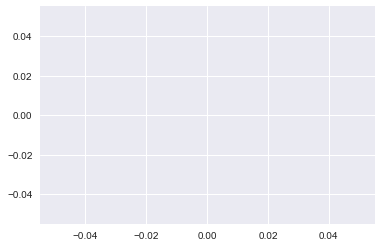

In [28]:
solve_gauss(X1_train, X1_test, Y1_train, Y1_test)

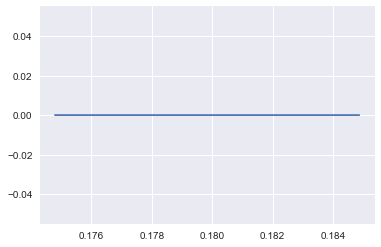

In [16]:
solve_gauss(X3_train, X3_test, Y3_train, Y3_test)

In [12]:
clf = linear_model.Lasso(alpha=0.0000000001)

In [13]:
clf.fit(X1_train, Y1_train)

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
clf.coef_

array([  1.50530535e-32,   3.37020163e+00,  -4.20609124e+00,
         9.12019050e-01,  -1.26951179e+03,   1.17809697e+01,
        -8.10125141e-06])

In [15]:
clf.score(X1_test, Y1_test)

0.0033311614085146379

In [16]:
cross_val_score(clf, Xtt, Y1tt, cv=5)

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want t

array([-0.00048492, -0.01341326, -0.00963235, -0.02427051,  0.00072608])